# Tratamiento de variables categoricas & suma de columnas de un dataset
* Realizaremos tratamiento de variables de tipo (masculino - femenino) para poder realizar una regresion lineal
* Vamos a sumar los datos de varias columnas y a guardar esa suma en una nueva columna

Dataset URL: https://www.kaggle.com/grosvenpaul/family-income-and-expenditure

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt #graficar

In [58]:
dataOriginal = pd.read_csv("../datasets/Family Income and Expenditure.csv")

In [59]:
dataOriginal.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


Deseo quedarme solo con las columas para replicar el ejercicio de trato de variables.
* Eliminare las innecesarias
* Sumare todos los gastos en una sola columna
* Eliminare los gastos individuales

In [60]:
#lista de columnas deseadas, a parte de las de gastos
deseadas = ['Total Household Income', 'Main Source of Income', 'Total Income from Entrepreneurial Acitivites', 
            'Household Head Sex', 'Household Head Age', 'Household Head Highest Grade Completed',
           'Household Head Job or Business Indicator', 'Total Number of Family members', 'Total number of family members employed']

In [61]:
gastos =['Total Food Expenditure',
         'Clothing, Footwear and Other Wear Expenditure','Housing and water Expenditure', 
         'Medical Care Expenditure','Transportation Expenditure',
         'Education Expenditure',
         'Communication Expenditure']
# variables extraidas para mejorar el total (haer la mayoria del gasto menor que el ingreso
# 'Alcoholic Beverages Expenditure','Tobacco Expenditure'
# 'Special Occasions Expenditure'
# 'Crop Farming and Gardening expenses'
# 'Miscellaneous Goods and Services Expenditure',
# 'Restaurant and hotels Expenditure',

In [62]:
deseadas

['Total Household Income',
 'Main Source of Income',
 'Total Income from Entrepreneurial Acitivites',
 'Household Head Sex',
 'Household Head Age',
 'Household Head Highest Grade Completed',
 'Household Head Job or Business Indicator',
 'Total Number of Family members',
 'Total number of family members employed']

In [63]:
data = dataOriginal[deseadas]
data.head()

,Total Household Income,Main Source of Income,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Total Number of Family members,Total number of family members employed
0,480332,Wage/Salaries,44370,Female,49,Teacher Training and Education Sciences Programs,With Job/Business,4,1
1,198235,Wage/Salaries,0,Male,40,Transport Services Programs,With Job/Business,3,2
2,82785,Wage/Salaries,0,Male,39,Grade 3,With Job/Business,6,3
3,107589,Wage/Salaries,15580,Male,52,Elementary Graduate,With Job/Business,3,2
4,189322,Wage/Salaries,75687,Male,65,Elementary Graduate,With Job/Business,4,2


In [64]:
sumexpenses = dataOriginal[gastos].sum(axis = 1, skipna = True) 

In [65]:
sumexpenses

0        233404
1        168786
2         79923
3        104077
4        139603
          ...  
41539     67710
41540     58501
41541     61242
41542    106650
41543     94761
Length: 41544, dtype: int64

In [66]:
data.loc[:,'Total Expenses'] = sumexpenses

C:\Users\luisb\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\luisb\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
data.head(25)

,Total Household Income,Main Source of Income,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Total Number of Family members,Total number of family members employed,Total Expenses
0,480332,Wage/Salaries,44370,Female,49,Teacher Training and Education Sciences Programs,With Job/Business,4,1,233404
1,198235,Wage/Salaries,0,Male,40,Transport Services Programs,With Job/Business,3,2,168786
2,82785,Wage/Salaries,0,Male,39,Grade 3,With Job/Business,6,3,79923
3,107589,Wage/Salaries,15580,Male,52,Elementary Graduate,With Job/Business,3,2,104077
4,189322,Wage/Salaries,75687,Male,65,Elementary Graduate,With Job/Business,4,2,139603
5,152883,Wage/Salaries,0,Male,46,Second Year High School,With Job/Business,4,3,103677
6,198621,Wage/Salaries,72290,Male,45,Third Year High School,With Job/Business,5,1,151584
7,134961,Other sources of Income,51840,Male,33,Business and Administration Programs,With Job/Business,5,0,147770
8,171152,Other sources of Income,0,Female,17,First Year College,No Job/Business,2,0,95698
9,625753,Enterpreneurial Activities,312974,Male,53,High School Graduate,With Job/Business,6,1,259517


## Tratamiento de variables categoricas
* las variables de 'Household Head Sex' y 'Household Head Job or Business Indicator' son categoricas, en este caso solo dos posibles para cada una.
* Crearemos variables Dummy para ambos casos

In [68]:
dummy_genderHead = pd.get_dummies(data["Household Head Sex"], prefix="Gender Head")
dummy_stateJob = pd.get_dummies(data["Household Head Job or Business Indicator"], prefix="State Job")
#esto dara una columna para cada valor y las llenara con 0´s y 1´s si aplica o no

In [69]:
dummy_genderHead.head()

,Gender Head_Female,Gender Head_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [70]:
dummy_stateJob.head()

,State Job_No Job/Business,State Job_With Job/Business
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Realizaremos un Join con nuestro dataset principal

In [71]:
column_names = data.columns.values.tolist() #tomo los nombres de las columnas y los guardo en una lista 
column_names

['Total Household Income',
 'Main Source of Income',
 'Total Income from Entrepreneurial Acitivites',
 'Household Head Sex',
 'Household Head Age',
 'Household Head Highest Grade Completed',
 'Household Head Job or Business Indicator',
 'Total Number of Family members',
 'Total number of family members employed',
 'Total Expenses']

In [72]:
data_new = data[column_names].join(dummy_genderHead)#uno las columnas actuales con los datos dummy de genero
column_names = data_new.columns.values.tolist()#guardo los nuevos nombres de columnas
data_new.head()

,Total Household Income,Main Source of Income,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Total Number of Family members,Total number of family members employed,Total Expenses,Gender Head_Female,Gender Head_Male
0,480332,Wage/Salaries,44370,Female,49,Teacher Training and Education Sciences Programs,With Job/Business,4,1,233404,1,0
1,198235,Wage/Salaries,0,Male,40,Transport Services Programs,With Job/Business,3,2,168786,0,1
2,82785,Wage/Salaries,0,Male,39,Grade 3,With Job/Business,6,3,79923,0,1
3,107589,Wage/Salaries,15580,Male,52,Elementary Graduate,With Job/Business,3,2,104077,0,1
4,189322,Wage/Salaries,75687,Male,65,Elementary Graduate,With Job/Business,4,2,139603,0,1


Agregamos ahora el State Job

In [73]:
data_new = data_new[column_names].join(dummy_stateJob)
data_new.head()

,Total Household Income,Main Source of Income,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Total Number of Family members,Total number of family members employed,Total Expenses,Gender Head_Female,Gender Head_Male,State Job_No Job/Business,State Job_With Job/Business
0,480332,Wage/Salaries,44370,Female,49,Teacher Training and Education Sciences Programs,With Job/Business,4,1,233404,1,0,0,1
1,198235,Wage/Salaries,0,Male,40,Transport Services Programs,With Job/Business,3,2,168786,0,1,0,1
2,82785,Wage/Salaries,0,Male,39,Grade 3,With Job/Business,6,3,79923,0,1,0,1
3,107589,Wage/Salaries,15580,Male,52,Elementary Graduate,With Job/Business,3,2,104077,0,1,0,1
4,189322,Wage/Salaries,75687,Male,65,Elementary Graduate,With Job/Business,4,2,139603,0,1,0,1


Ahora vamos a integrar esos valores a nuestro modelo

In [74]:
mis_predictoras = ['Total Household Income', 'Total Income from Entrepreneurial Acitivites', 
                   'Household Head Age','Total Number of Family members',
                   'Total number of family members employed','Gender Head_Male', 'Gender Head_Female', 
                   'State Job_No Job/Business', 'State Job_With Job/Business']

**NOTA IMPORTANTE** Recuerda que para la regresion lineal solo usamos variables numericas. Es por eso que nos tomamos el trabajo de convertir categorias a estados binarios

In [75]:
X = data_new[mis_predictoras]
Y = data_new['Total Expenses']#intento predecir gastos

### Creamos el modelo

In [76]:
lm = LinearRegression()#cargo objeto en la variable
lm.fit(X,Y)#inicio entrenamiento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
lm.intercept_

42531.26095049248

In [78]:
lm.coef_

array([ 4.35584682e-01, -1.98772117e-01, -6.49620452e+01,  6.89198892e+03,
       -4.59542366e+03, -1.05816354e+03,  1.05816354e+03,  4.31886103e+03,
       -4.31886103e+03])

In [79]:
list(zip(mis_predictoras, lm.coef_))
#Gender Female y Gender male tienen los mismos valores (positivo y negativo)
# igual con las de Job

[('Total Household Income', 0.43558468220719654),
 ('Total Income from Entrepreneurial Acitivites', -0.198772116762159),
 ('Household Head Age', -64.96204524906568),
 ('Total Number of Family members', 6891.988921595984),
 ('Total number of family members employed', -4595.423659430854),
 ('Gender Head_Male', -1058.163539501067),
 ('Gender Head_Female', 1058.163539501067),
 ('State Job_No Job/Business', 4318.86103489133),
 ('State Job_With Job/Business', -4318.861034891329)]

In [80]:
lm.score(X,Y)#R2, Este Valor no es muy muy bueno. incluso podria tomarse por NO Aceptable. 

0.7099306139315616

El bajo valor puede deberse a que la relacion entre estas varaibles no es lineal o bien a que falta informacion del dataset original que hemos operado

#### Descripcion del modelo 
El modelo se puede describir en su ecuacion de la siguiente manera:
* Total Expenses = 42531.26095049248 + Total Household Income * 0.43558468 + 
    Total Income from Entrepreneurial Acitivites * -0.19877 +
    Household Head Age * -64.962045 + Total Number of Family members * 6891.9889 +
    Total number of family members employed * -4595.423659 +
    Gender Head_Male * -1058.163539 +
    Gender Head_Female * 1058.163539 + 
    State Job_No Job/Business * 4318.86 + 
    State Job_With Job/Business * -4318.86

### Realizando la prediccion

In [81]:
data_new["predict"]=lm.predict(X) # realizo prediccion

Esta prediccion tambien se puede realizar de forma manual con la ecuacion que acabamos de describir. Sin embargo me parece mas rapido y eficiente hacerlo con la funcion de Python.

In [82]:
data_new.head()

,Total Household Income,Main Source of Income,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Total Number of Family members,Total number of family members employed,Total Expenses,Gender Head_Female,Gender Head_Male,State Job_No Job/Business,State Job_With Job/Business,predict
0,480332,Wage/Salaries,44370,Female,49,Teacher Training and Education Sciences Programs,With Job/Business,4,1,233404,1,0,0,1,259465.698018
1,198235,Wage/Salaries,0,Male,40,Transport Services Programs,With Job/Business,3,2,168786,0,1,0,1,132389.003489
2,82785,Wage/Salaries,0,Male,39,Grade 3,With Job/Business,6,3,79923,0,1,0,1,98246.257079
3,107589,Wage/Salaries,15580,Male,52,Elementary Graduate,With Job/Business,3,2,104077,0,1,0,1,89028.580264
4,189322,Wage/Salaries,75687,Male,65,Elementary Graduate,With Job/Business,4,2,139603,0,1,0,1,118730.109806


### Conociendo el error

In [83]:
SSD = np.sum((data_new["predict"] - data_new["Total Expenses"])**2)
SSD

217548457702453.4

In [84]:
RSE = np.sqrt(SSD/(len(data_new)-len(mis_predictoras)-1))
RSE

72372.9249669589

In [85]:
sales_mean=np.mean(data_new["Total Expenses"])
sales_mean

158964.81499133448

In [86]:
error = RSE/sales_mean
error*100 #100 para hacerlo en porcentaje

45.527637654221856

**Un error del 45% NADA ACEPTABLE**

## Enmascarando o eliminando variables dummy redundantes

Eliminaremos ambas columnas de genero y job_State.
* Si tuvieramos 3 nos quedariamos solo con dos columnas y asi sucesivamente la formula sera n_columns = n-1

In [87]:
#eliminamos una columna de genero 
dummy_genderHead = pd.get_dummies(data_new["Household Head Sex"], prefix="Gender Head").iloc[:,1:]
dummy_genderHead.head()

,Gender Head_Male
0,0
1,1
2,1
3,1
4,1


In [88]:
#elimino una columna de StateJob
dummy_stateJob = pd.get_dummies(data_new["Household Head Job or Business Indicator"], prefix="State Job").iloc[:,1:] 
#iloc dice: todas las filas de la 1 hacia adelante sin incluirla
dummy_stateJob.head()

,State Job_With Job/Business
0,1
1,1
2,1
3,1
4,1


In [89]:
column_names = data.columns.values.tolist() #tomo los nombres del dataset original
data_new = data[column_names].join(dummy_genderHead) #le agrego dummy_gender a nuestro nuevo data frame
column_names = data_new.columns.values.tolist() #lista de nuevos nombres de columnas
data_new = data_new[column_names].join(dummy_stateJob)#uno el city tier
data_new.head()

,Total Household Income,Main Source of Income,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Total Number of Family members,Total number of family members employed,Total Expenses,Gender Head_Male,State Job_With Job/Business
0,480332,Wage/Salaries,44370,Female,49,Teacher Training and Education Sciences Programs,With Job/Business,4,1,233404,0,1
1,198235,Wage/Salaries,0,Male,40,Transport Services Programs,With Job/Business,3,2,168786,1,1
2,82785,Wage/Salaries,0,Male,39,Grade 3,With Job/Business,6,3,79923,1,1
3,107589,Wage/Salaries,15580,Male,52,Elementary Graduate,With Job/Business,3,2,104077,1,1
4,189322,Wage/Salaries,75687,Male,65,Elementary Graduate,With Job/Business,4,2,139603,1,1


¿Que sigue?
- graficar para ver relacion ingresos-egresos
- revisar nuevamente el modelo (entrenar de nuevo)
* Continuar con conversion de variables para hacer una regresion de otro tipo

In [90]:
#se agrego una nueva variable: "Entrepreneurial activities"
predict_columns = ['Total Household Income', 'Total Income from Entrepreneurial Acitivites', 'Household Head Age', 
                   'Total Number of Family members', 'Total number of family members employed','Gender Head_Male', 
                   'State Job_With Job/Business']
X = data_new[predict_columns] #eje X como las variables predictoras
Y = data_new["Total Expenses"] #Eje Y que vamos a predecir
lm = LinearRegression()#tipo de modelo
lm.fit(X,Y)#ejecuto entrenamiento con los datos

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lm.intercept_ #ordenada en el origen

47908.28552488498

In [92]:
list(zip(predict_columns, lm.coef_))

[('Total Household Income', 0.4355846822071948),
 ('Total Income from Entrepreneurial Acitivites', -0.1987721167621586),
 ('Household Head Age', -64.96204524906352),
 ('Total Number of Family members', 6891.988921596034),
 ('Total number of family members employed', -4595.423659430864),
 ('Gender Head_Male', -2116.3270790021124),
 ('State Job_With Job/Business', -8637.722069782723)]

In [93]:
lm.score(X,Y)

0.7099306139315616

El valor de prediccion sigue siendo mas o menos el mismo **(es muy malo)**

## Transformación de variables para conseguir una relacion no lineal
* **No solo existen relaciones lineales** hay de otros tipos: uadraticas, exponenciales, logaritmicas o polinomios de grado elevado.

* **En estos casos se recomienda transformar la varaible para ajustarnos a lo que deseamos**

* **Para saber si la relacion es lineal o no, lo mejor es hacer un grafico**. Si la forma es muy extraña para las variables predictoras sera necesario operar esa variable

* **crearemos una relacion entre ingresos y egresos

Text(0.5, 1.0, 'Ingresos vs Gastos')

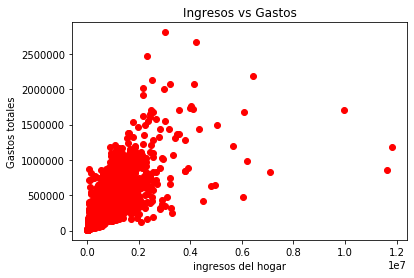

In [94]:
%matplotlib inline
data_grafic = data_new #copia del dataset (exclusiva para hacer cirugia al momento de graficar)

data_grafic["Total Household Income"] = data_grafic["Total Household Income"].dropna()#borro columnas vacias
data_grafic["Total Expenses"] = data_grafic["Total Expenses"].dropna()#borro columnas vacias
plt.plot(data_grafic["Total Household Income"], data_grafic["Total Expenses"], "ro")#primero dato en x,y ; luego rojo y en bolitas

#pongo titulos a ejes 
plt.xlabel("ingresos del hogar")
plt.ylabel("Gastos totales")
plt.title("Ingresos vs Gastos")

In [112]:
data2 = pd.read_csv("../datasets/auto-mpg.csv")
data2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'HorsePower vs MPG')

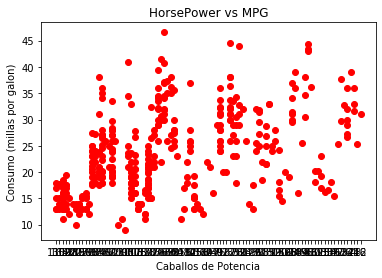

In [109]:
%matplotlib inline
data2["mpg"] = data2["mpg"].dropna()#borro columnas vacias
data2["horsepower"] = data2["horsepower"].dropna()#borro columnas vacias
plt.plot(data2["horsepower"], data2["mpg"], "ro")#primero dato en x,y ; luego rojo y en bolitas

#pongo titulos a ejes 
plt.xlabel("Caballos de Potencia")#o horsepower
plt.ylabel("Consumo (millas por galon)")#mpg
plt.title("HorsePower vs MPG")

**NOTA IMPORTANTE**
Se deja el ejercicio hasta aqui por que no encontre un dataset con relacion cuadratica (polinomio grado 2)
* Puedes consultar un ejercio completo aqui (_en notebooks del curso_): 
    * _T4 - 5 - Linear Regression - Problemas con la regresión lineal_